<a href="https://colab.research.google.com/github/gwenostergren/20MA573/blob/master/src/HW5_All_Parts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Basics

- Proposition 1
- Exercise 3




**Example 1**
Using algo1, design esitimator $\pi(N)$ and compute $\pi(10000)$

In [41]:
#Estimating Pi
import numpy as np
import matplotlib.pyplot as plt

def MCPI(N):
  count = N
  n = 0
  for i in range(1,count):
    X = np.random.uniform(-1,1)
    Y = np.random.uniform(-1,1)
    if (X**2 + Y**2 < 1):
      n = n + 1

  return (4*n/count)

print(MCPI(10000000))

3.141188


**Exercise 4**
- Use $\beta_{100}$ of ex 3 to estimate $MSE(\pi_N)$ by repeating $\pi_N$ of Ex 1. One must write both Pseudocode and Python code

Pseudocode

- procedure MSEBETA (count, val)
  - alpha $\to$ 0
  - for $i = 1, ... , N$ do
    - call the MCPI function and add value to alpha and put in a list
  - mean $\to$ $1/N(alpha)$
  - s $\to$ 0
  - for $i = 1, ... , N$
    - add $(est_i - mean)^2$ to s
  - return $(1/N)(s)$



In [44]:
# Estimating MSE of MCPI function
pi = 3.14159265359

def MSEBETA(count, val):
  alpha = 0
  estimates = []
  for i in range(0,count): #estimating the mean (alpha sub N)
    est = MCPI(10000)
    alpha = alpha + est
    estimates.append(est)
  mean = (1/count)*(alpha)
  
  s = 0
  for i in range(0,count): # Calculating beta sub N
    s = s + (estimates[i] - mean)**2
  return (1/count)*(s)
MSEBETA(100, pi)

0.000244923904

- Repeat the above estimation of $MSE(\pi_N)$ for $N = 2^5, ..., 2^10$

In [49]:
# Repeating with different values of N
nlist = []
betalist = []
for i in range(5,10): nlist.append(2**i)
for i in range(0,5): betalist.append(MSEBETA(nlist[i],pi))
print (betalist)

[0.0003314523437499995, 0.00029021558593749966, 0.0002875585937499995, 0.00028610871093750025, 0.00027024996093750017]


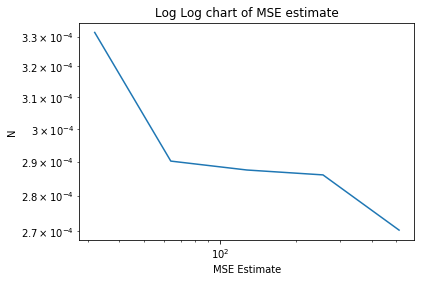

In [51]:
plt.loglog(nlist, betalist)
plt.xlabel('MSE Estimate')
plt.ylabel('N')
plt.title('Log Log chart of MSE estimate');
plt.show()


# Monte Carlo Integral


**Example 2**
- Implement Algorithm 1 for estimator $\alpha_N$
- Estimate $MSE(\alpha_N)$ for $N = 2^5, ..., 2^10$


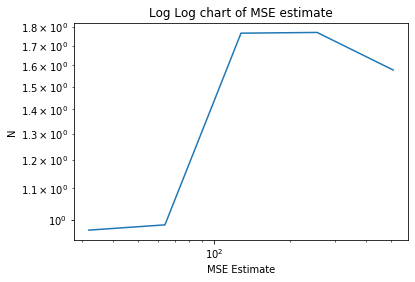

In [65]:

def MCINTEGRAL(N):
  s = 0
  for i in range(1,N):
    X = np.random.uniform(0,1)
    if (X < 0.01):s += 100
    if ((X > 0.01) and (X<1)): s += 1
  return (s/N)

nnlist = []
intlist = []
for i in range(5,10): nnlist.append(2**i)
for i in range(0,5): intlist.append(MCINTEGRAL(nlist[i]))

plt.loglog(nlist, intlist)
plt.xlabel('MSE Estimate')
plt.ylabel('N')
plt.title('Log Log chart of MSE estimate');
plt.show()